In [ ]:
# Install required tools
!pip install GEOparse pyBigWig matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.1/187.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import GEOparse

# Example dataset: GSM468792 (IMR90 DNase-seq from Roadmap Epigenomics)
gsm_id = "GSM468792"

print(f"Fetching {gsm_id} metadata from GEO...")
gsm = GEOparse.get_GEO(geo=gsm_id, destdir=".")

# Print summary metadata
print("\nSample Metadata:")
for k, v in gsm.metadata.items():
    print(k, ":", v)


15-Sep-2025 05:23:19 DEBUG utils - Directory . already exists. Skipping.
DEBUG:GEOparse:Directory . already exists. Skipping.
15-Sep-2025 05:23:19 INFO GEOparse - Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GSM468792&form=text&view=full to ./GSM468792.txt
INFO:GEOparse:Downloading http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GSM468792&form=text&view=full to ./GSM468792.txt


Fetching GSM468792 metadata from GEO...


15-Sep-2025 05:23:19 DEBUG downloader - Total size: 0
DEBUG:GEOparse:Total size: 0
15-Sep-2025 05:23:19 DEBUG downloader - md5: None
DEBUG:GEOparse:md5: None
12.4kB [00:00, 19.1MB/s]
15-Sep-2025 05:23:19 DEBUG downloader - Moving /tmp/tmpbwqfy4in to /content/GSM468792.txt
DEBUG:GEOparse:Moving /tmp/tmpbwqfy4in to /content/GSM468792.txt
15-Sep-2025 05:23:19 DEBUG downloader - Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GSM468792&form=text&view=full
DEBUG:GEOparse:Successfully downloaded http://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?targ=self&acc=GSM468792&form=text&view=full
15-Sep-2025 05:23:19 INFO GEOparse - Parsing ./GSM468792.txt: 
INFO:GEOparse:Parsing ./GSM468792.txt: 



Sample Metadata:
title : ['Chromatin accessibility assay of IMR90 Cell Line; DS11759']
geo_accession : ['GSM468792']
status : ['Public on Jan 06 2010']
submission_date : ['Nov 06 2009']
last_update_date : ['May 15 2019']
type : ['SRA']
channel_count : ['1']
source_name_ch1 : ['IMR90 Cell Line; DS11759']
organism_ch1 : ['Homo sapiens']
taxid_ch1 : ['9606']
characteristics_ch1 : ['molecule: genomic DNA', 'disease: None', 'biomaterial_provider: ATCC', 'biomaterial_type: Cell Line', 'line: IMR90', 'lineage: NA', 'differentiation_stage: Fetal lung fibroblast', 'differentiation_method: NA', 'passage: 4', "medium: Eagle's Minimum Essential Medium, Catalog No. 30-2003.", 'Sex: Female', 'batch: CCL-186', 'experiment_type: Chromatin Accessibility', 'extraction_protocol: Qiagen minElut', 'dnase_protocol: Stamlab DNase Protocol']
molecule_ch1 : ['genomic DNA']
extract_protocol_ch1 : ['Library construction protocol: Single read - Illumina']
description : ['Design description: Chromatin accessibili

In [ ]:
# Install tools
!apt-get install -y samtools bedtools
!pip install pyBigWig matplotlib pandas


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhts3 libhtscodecs2
Suggested packages:
  cwltool
The following NEW packages will be installed:
  bedtools libhts3 libhtscodecs2 samtools
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 1,525 kB of archives.
After this operation, 3,818 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 bedtools amd64 2.30.0+dfsg-2ubuntu0.1 [563 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhtscodecs2 amd64 1.1.1-3 [53.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhts3 amd64 1.13+ds-2build1 [390 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 samtools amd64 1.13-4 [520 kB]
Fetched 1,525 kB in 1s (1,362 kB/s)
Selecting previously unselected package bedtools.
(Reading database ... 126374 files and directories 

In [ ]:
# Example: Download BED file (peaks of DNase hypersensitivity)
!wget -O IMR90_DNase.bed.gz ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM468nnn/GSM468792/suppl/GSM468792_UW.IMR90.ChromatinAccessibility.DS11759.bed.gz
!gunzip IMR90_DNase.bed.gz
!head IMR90_DNase.bed


--2025-09-15 05:26:20--  ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM468nnn/GSM468792/suppl/GSM468792_UW.IMR90.ChromatinAccessibility.DS11759.bed.gz
           => ‘IMR90_DNase.bed.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/samples/GSM468nnn/GSM468792/suppl ... done.
==> SIZE GSM468792_UW.IMR90.ChromatinAccessibility.DS11759.bed.gz ... 429347725
==> PASV ... done.    ==> RETR GSM468792_UW.IMR90.ChromatinAccessibility.DS11759.bed.gz ... done.
Length: 429347725 (409M) (unauthoritative)

GSM468792_UW.IMR90. 100%[===================>] 409.46M  52.3MB/s    in 6.4s    

2025-09-15 05:26:27 (64.0 MB/s) - ‘IMR90_DNase.bed.gz’ saved [429347725]

chr1	9969	9997	SOLEXA-1GA-1_1:2:54:1275:2036	-
chr1	9970	10004	SOLEXA-1GA-1_1:4:44:

              start           end        length
count  3.418377e+07  3.418377e+07  3.418377e+07
mean   7.176044e+07  7.176048e+07  3.426783e+01
std    5.832277e+07  5.832277e+07  2.087434e+00
min    1.000000e+00  2.600000e+01  2.000000e+01
25%    2.393810e+07  2.393813e+07  3.500000e+01
50%    6.056326e+07  6.056329e+07  3.500000e+01
75%    1.107903e+08  1.107903e+08  3.500000e+01
max    2.492406e+08  2.492406e+08  3.700000e+01


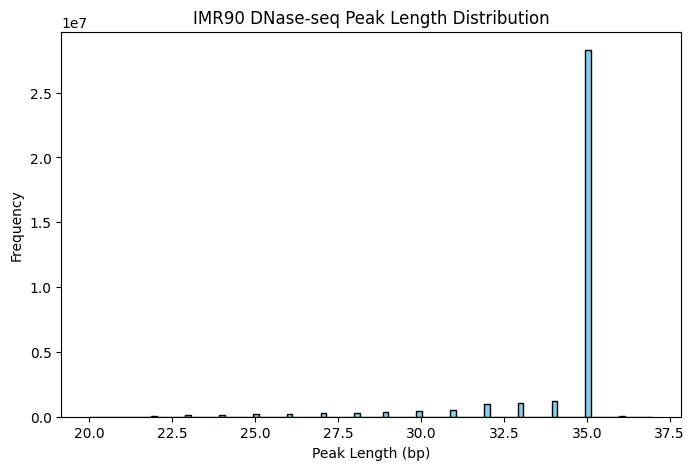

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load BED file
cols = ["chrom", "start", "end"]
bed_df = pd.read_csv("IMR90_DNase.bed", sep="\t", names=cols, usecols=[0,1,2])

# Compute peak length
bed_df["length"] = bed_df["end"] - bed_df["start"]

# Summary statistics
print(bed_df.describe())

# Plot peak length distribution
plt.figure(figsize=(8,5))
plt.hist(bed_df["length"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("Peak Length (bp)")
plt.ylabel("Frequency")
plt.title("IMR90 DNase-seq Peak Length Distribution")
plt.show()
